<a href="https://colab.research.google.com/github/kunalkishanmehta/ns-struc-dm/blob/master/Two_fluid_code_clean_sly.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

In [2]:
import numpy as np # import packages
import matplotlib.pyplot as plt
import scipy.interpolate
from scipy.optimize import curve_fit
from scipy.interpolate import interp1d

In [ ]:
# download and install the code

%%bash
# make this cell an instance of a terminal

git clone https://github.com/kunalkishanmehta/ns-struc-dm.git # download code repository from https://github.com/landryp/ns-struc/tree/enthalpy
python2 -m pip install scipy

mkdir /opt/bin /opt/lib/ /opt/lib/python2.7 /opt/lib/python2.7/site-packages # create install directory and make it findable
export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

cd /content/ns-struc-dm # install code
python2 setup.py install --prefix /opt/

echo -e '\n *** \n'

getnsprops -h # this is the executable from ns-struc that solves the TOV equations to compute neutron star observables; print its help string to see the syntax for calling it

echo -e '\n *** \n'

In [ ]:
%%bash
export PATH=$PATH:/opt/bin
export PYTHONPATH=$PYTHONPATH:/opt/lib/python2.7/site-packages

cd /content/ns-struc-dm # install code
git pull
python2 setup.py install --prefix /opt/



In [5]:
import zipfile
with zipfile.ZipFile('/content/ns-struc-dm/file/sly.zip', 'r') as zip_ref:
    zip_ref.extractall('/content')

In [6]:
dat = np.genfromtxt('/content/ns-struc-dm/file/macro-sly.csv',delimiter=',',dtype=None,names=True)

data_list = []
for i in range(11):
  data_list.append(np.genfromtxt('/content/macro_contour{}sly.csv'.format(i),delimiter=',',names=True,dtype=None))

data_con_sly0 = np.genfromtxt('/content/macro_contour0sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly1 = np.genfromtxt('/content/macro_contour1sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly2 = np.genfromtxt('/content/macro_contour2sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly3 = np.genfromtxt('/content/macro_contour3sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly4 = np.genfromtxt('/content/macro_contour4sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly5 = np.genfromtxt('/content/macro_contour5sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly6 = np.genfromtxt('/content/macro_contour6sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly7 = np.genfromtxt('/content/macro_contour7sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly8 = np.genfromtxt('/content/macro_contour8sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly9 = np.genfromtxt('/content/macro_contour9sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly10 = np.genfromtxt('/content/macro_contour10sly.csv',delimiter=',',names=True,dtype=None)


data_con_sly_mb0 = np.genfromtxt('/content/macro_contour_mb0sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly_mb1 = np.genfromtxt('/content/macro_contour_mb1sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly_mb2 = np.genfromtxt('/content/macro_contour_mb2sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly_mb3 = np.genfromtxt('/content/macro_contour_mb3sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly_mb4 = np.genfromtxt('/content/macro_contour_mb4sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly_mb5 = np.genfromtxt('/content/macro_contour_mb5sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly_mb6 = np.genfromtxt('/content/macro_contour_mb6sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly_mb7 = np.genfromtxt('/content/macro_contour_mb7sly.csv',delimiter=',',names=True,dtype=None)


data_con_sly_md0 = np.genfromtxt('/content/macro_contour_md0sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly_md1 = np.genfromtxt('/content/macro_contour_md1sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly_md2 = np.genfromtxt('/content/macro_contour_md2sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly_md3 = np.genfromtxt('/content/macro_contour_md3sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly_md4 = np.genfromtxt('/content/macro_contour_md4sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly_md5 = np.genfromtxt('/content/macro_contour_md5sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly_md6 = np.genfromtxt('/content/macro_contour_md6sly.csv',delimiter=',',names=True,dtype=None)
data_con_sly_md7 = np.genfromtxt('/content/macro_contour_md7sly.csv',delimiter=',',names=True,dtype=None)




In [7]:
def filter_R(data,model,n):

  lim = np.argmax((data['M']+data['Mdm']))
  # plt.scatter(np.maximum(data['R'][:lim+10],data[:lim+10]['Rdm']),((data['M']+data['Mdm'])[:lim+10]), label = '{}'.format(model), marker = 'p')
  
  for i in range(len(data)):
    if data['R'][i] < data['Rdm'][i]:
      plt.scatter(data['R'][i],(data['M']+data['Mdm'])[i], marker = '.', color = 'lawngreen', s =3)
    elif data['R'][i] > data['Rdm'][i]:
      plt.scatter(data['R'][i],(data['M']+data['Mdm'])[i], marker = '.', color = 'm', s=3)
    else:
      plt.scatter(data['R'][i],(data['M']+data['Mdm'])[i], marker = 'o', color = 'b', s=3)

  # plt.plot(data['R'][0::n],(data['M']+data['Mdm'])[0::n], label = '{} R0'.format(model), color = 'k')
  plt.scatter(data['R'][0::n],(data['M']+data['Mdm'])[0::n], label = '{} R0'.format(model), color = 'k', s = 10)

  return

In [8]:
def filter_fdm(data,model,n):

  # lim = np.argmax((data['M']+data['Mdm']))
  # plt.scatter(np.maximum(data['R'][:lim+10],data[:lim+10]['Rdm']),((data['M']+data['Mdm'])[:lim+10]), label = '{}'.format(model), marker = 'p')
  
  for i in range(len(data)):
    if data['fdm'][i] < 0.5:
      plt.scatter(data['R'][i],(data['Mg'])[i], marker = '.', color = 'm', s = 3)
    elif data['fdm'][i] > 0.5:
      plt.scatter(data['R'][i],(data['Mg'])[i], marker = '.', color = 'c', s = 3)
    else:
      plt.scatter(data['R'][i],(data['Mg'])[i], marker = '.', color = 'gray', s = 3)

  plt.scatter(data['R'][0::n],(data['Mg'])[0::n], label = '{} R0'.format(model), marker = 'o', color = 'k', s = 10)

  return

In [9]:
def plots(data,i,n,R,model):
  
  plt.scatter(data['R'][i::n],(data['Mg'][i::n]), label = '{} R={}'.format(model,R))


  plt.xlim(8.,16.)
  plt.ylim(1.,3.)
  plt.xlabel(r'$max(R+R_{DM})$ [km]', size = 16) # add plot labels, etc.
  plt.ylabel(r'$M+M_{DM}$ [$M_\odot$]', size = 16)
  plt.legend(fontsize = 16, title='Equation of State',title_fontsize=18 )
  plt.xticks(fontsize=16)
  plt.yticks(fontsize=16)
  return

In [10]:
# to associate the dark matter fraction to each point in rhoc-rhocdm space, interpolate 3D (rhoc,rhocdm,fdm) data to get a function fdm(rhoc,rhocdm)

x = dat['rhoc'] # input data
y = dat['rhocdm']
z = dat['fdm']

X = np.linspace(0.1e14,3.1e15,1000) # the grid where we'll evaluate fdm(rhoc,rhocdm)
Y = np.linspace(0.1e14,3.1e15,1000)
x_grid, y_grid = np.meshgrid(X, Y)

outdat = scipy.interpolate.griddata((x,y),z,(x_grid,y_grid),'linear')
 # fdm evaluated on the grid, with one of three methods: nearest, linear, cubic

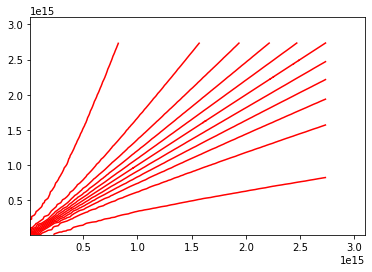

In [11]:
# plot the interpolated fdm function 


num_cs = 9
cs = plt.contour(x_grid,y_grid,outdat,list(np.geomspace(1e-2,0.1,2))+list(np.linspace(0.1,0.9,num_cs)[1:])+list(reversed(1.-np.geomspace(1e-2,0.1,2)[:-1])),colors='r') # plot the contours of constant fdm(rhoc,rhocdm)



In [12]:
# extract the (rhoc,rhocdm) coordinates of the constant-fdm contours

contours = []
for i in range(num_cs+3):
  try: c = cs.allsegs[i][0] # if a contour was plotted, save it
  except: continue
  contours += [c] # list that stores all the extracted contours




In [13]:
# downsample the contours to get a list of (rhoc,rhocdm) coordinates to use to generate a constant-fdm sequence of stars

num_stars = 100 # how many stars to aim for in the sequence
rhocs, rhocdms = [], []

for c in contours:
  
  skip = int(len(c[:,0])/num_stars)
  rhocs += [c[::skip,0]]
  rhocdms += [c[::skip,1]] # downselect to num_stars (rhoc,rhocdm) points


rhomin = 2.8e14 # because some central densities are too small to give physical neutron stars, throw out those below rhomin
rhomax = 12*rhomin # because some central densities are too large to give physical neutron stars, throw out those above rhomax
rhocs_out, rhocdms_out = [], []

for c,cdm in zip(rhocs,rhocdms):
  c_out, cdm_out = [], []

  for rhoc,rhocdm in zip(c,cdm):
    
    if (rhoc >= rhomin or rhocdm >= rhomin) and rhoc <= rhomax and rhocdm <=rhomax: # one of rhoc/rhocdm below rhomin is ok, to allow pure regular matter or pure dm star
      c_out += [rhoc]
      cdm_out += [rhocdm]
  rhocs_out += [c_out]
  rhocdms_out += [cdm_out]

In [14]:
def find_rhos(n):
  newrhoc = [str(r) for r in rhocs_out[n]]
  find_rhos.newrhocs_list = ','.join(newrhoc)

  newrhocdm = [str(r) for r in rhocdms_out[n]]
  find_rhos.newrhocdms_list = ','.join(newrhocdm)
  return find_rhos.newrhocs_list, find_rhos.newrhocdms_list


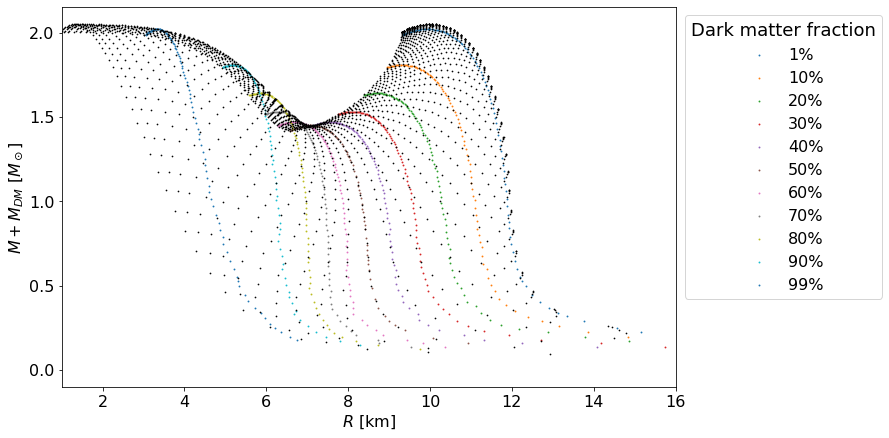

In [15]:


# plot the surviving M-R data
plt.figure(figsize= (11,7))
# filter_fdm(dat,'sly',48)
plt.scatter(data_con_sly0['R'],data_con_sly0['Mg'],marker='.',s=3, label = '1%')
plt.scatter(data_con_sly1['R'],data_con_sly1['Mg'],marker='.',s=3, label = '10%')
plt.scatter(data_con_sly2['R'],data_con_sly2['Mg'],marker='.',s=3, label = '20%')
plt.scatter(data_con_sly3['R'],data_con_sly3['Mg'],marker='.',s=3, label = '30%')
plt.scatter(data_con_sly4['R'],data_con_sly4['Mg'],marker='.',s=3, label = '40%')
plt.scatter(data_con_sly5['R'],data_con_sly5['Mg'],marker='.',s=3, label = '50%')
plt.scatter(data_con_sly6['R'],data_con_sly6['Mg'],marker='.',s=3, label = '60%')
plt.scatter(data_con_sly7['R'],data_con_sly7['Mg'],marker='.',s=3, label = '70%')
plt.scatter(data_con_sly8['R'],data_con_sly8['Mg'],marker='.',s=3, label = '80%')
plt.scatter(data_con_sly9['R'],data_con_sly9['Mg'],marker='.',s=3, label = '90%')
plt.scatter(data_con_sly10['R'],data_con_sly10['Mg'],marker='.',s=3, label = '99%')
plt.scatter(dat['R'],dat['Mg'],marker='.',s=2,c='k')
plt.xlabel(r'$R$ [km]', size = 16) # add plot labels, etc.
plt.ylabel(r'$M+M_{DM}$ [$M_\odot$]', size = 16)
plt.xlim(1.,16.)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(bbox_to_anchor=(1.35, 1), fontsize = 16, title='Dark matter fraction',title_fontsize=18 )
plt.show()

In [16]:
# to associate the (dark) baryon mass to each point in rhoc-rhocdm space, interpolate 3D (rhoc,rhocdm,Mb) data to get a function Mb(rhoc,rhocdm)

x = dat['rhoc'] # input data
y = dat['rhocdm']
z = dat['Mb']
zdm = dat['Md']

X = np.linspace(0.1e14,3.1e15,1000) # the grid where we'll evaluate Mb(rhoc,rhocdm)
Y = np.linspace(0.1e14,3.1e15,1000)
x_grid, y_grid = np.meshgrid(X, Y)

outdat = scipy.interpolate.griddata((x,y),z,(x_grid,y_grid),'linear') # Mb evaluated on the grid, with one of three methods: nearest, linear, cubic
outdat_dm = scipy.interpolate.griddata((x,y),zdm,(x_grid,y_grid),'linear') # Md evaluated on the grid

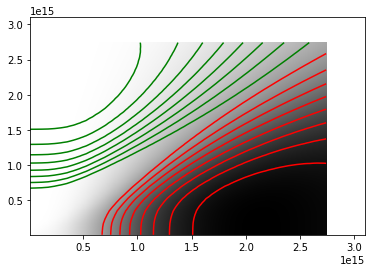

In [17]:
# plot the interpolated Mb and Md functions

plt.pcolormesh(x_grid,y_grid,outdat,cmap='gray_r') # show Mb(rhoc,rhocdm) as a color map (darker = larger Mb)
#plt.pcolormesh(x_grid,y_grid,outdat,cmap='gray_r') # show Md(rhoc,rhocdm) as a color map (darker = larger Mb) -- but can't seem to show two colormaps at once

num_cs = 11
cs = plt.contour(x_grid,y_grid,outdat,list(np.linspace(1.,3.,num_cs)),colors='r') # plot the contours of constant Mb(rhoc,rhocdm)
cs_dm = plt.contour(x_grid,y_grid,outdat_dm,list(np.linspace(1.,3.,num_cs)),colors='g') # plot the contours of constant Md(rhoc,rhocdm)


In [18]:
# extract the (rhoc,rhocdm) coordinates of the constant-fdm contours

contours = []
for i in range(num_cs+3):
  try: c = cs.allsegs[i][0] # if a contour was plotted, save it
  except: continue
  contours += [c] # list that stores all the extracted contours


In [19]:
# downsample the contours to get a list of (rhoc,rhocdm) coordinates to use to generate a constant-fdm sequence of stars

num_stars = 100 # how many stars to aim for in the sequence
rhocs, rhocdms = [], []

for c in contours:
  
  skip = int(len(c[:,0])/num_stars)
  rhocs += [c[::skip,0]]
  rhocdms += [c[::skip,1]] # downselect to num_stars (rhoc,rhocdm) points


rhomin = 2.8e14 # because some central densities are too small to give physical neutron stars, throw out those below rhomin
rhomax = 12*rhomin # because some central densities are too large to give physical neutron stars, throw out those above rhomax
rhocs_out, rhocdms_out = [], []

for c,cdm in zip(rhocs,rhocdms):
  c_out, cdm_out = [], []

  for rhoc,rhocdm in zip(c,cdm):
    
    if (rhoc >= rhomin or rhocdm >= rhomin) and rhoc <= rhomax and rhocdm <=rhomax: # one of rhoc/rhocdm below rhomin is ok, to allow pure regular matter or pure dm star
      c_out += [rhoc]
      cdm_out += [rhocdm]
  rhocs_out += [c_out]
  rhocdms_out += [cdm_out]

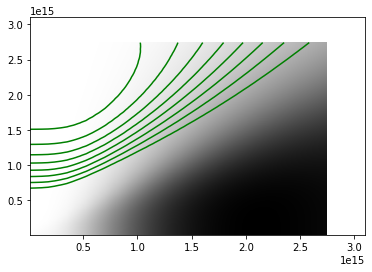

In [20]:
# plot the interpolated Mb and Md functions

plt.pcolormesh(x_grid,y_grid,outdat,cmap='gray_r') # show Mb(rhoc,rhocdm) as a color map (darker = larger Mb)
#plt.pcolormesh(x_grid,y_grid,outdat,cmap='gray_r') # show Md(rhoc,rhocdm) as a color map (darker = larger Mb) -- but can't seem to show two colormaps at once

num_cs = 11
# cs = plt.contour(x_grid,y_grid,outdat,list(np.linspace(1.,3.,num_cs)),colors='r') # plot the contours of constant Mb(rhoc,rhocdm)
cs_dm = plt.contour(x_grid,y_grid,outdat_dm,list(np.linspace(1.,3.,num_cs)),colors='g') # plot the contours of constant Md(rhoc,rhocdm)


In [21]:
contours_dm = []
for i in range(num_cs+1):
  try: c = cs_dm.allsegs[i][0] # if a contour was plotted, save it
  except: continue
  contours_dm += [c] # list that stores all the extracted contours


In [22]:
# downsample the contours to get a list of (rhoc,rhocdm) coordinates to use to generate a constant-fdm sequence of stars

num_stars = 100 # how many stars to aim for in the sequence
rhocs, rhocdms = [], []

for c in contours_dm:
  
  skip = int(len(c[:,0])/num_stars)
  rhocs += [c[::skip,0]]
  rhocdms += [c[::skip,1]] # downselect to num_stars (rhoc,rhocdm) points


rhomin = 2.8e14 # because some central densities are too small to give physical neutron stars, throw out those below rhomin
rhomax = 12*rhomin # because some central densities are too large to give physical neutron stars, throw out those above rhomax
rhocs_out, rhocdms_out = [], []

for c,cdm in zip(rhocs,rhocdms):
  c_out, cdm_out = [], []

  for rhoc,rhocdm in zip(c,cdm):
    
    if (rhoc >= rhomin or rhocdm >= rhomin) and rhoc <= rhomax and rhocdm <=rhomax: # one of rhoc/rhocdm below rhomin is ok, to allow pure regular matter or pure dm star
      c_out += [rhoc]
      cdm_out += [rhocdm]
  rhocs_out += [c_out]
  rhocdms_out += [cdm_out]

In [23]:
def find_max(file):
  l = np.argmax((file['Mg']))
  R, M, rho_c, rho_cdm = file['R'][l], file['Mg'][l], file['rhoc'][l], file['rhocdm'][l]
  return R,M, rho_c, rho_cdm

In [24]:
stable_md = []


In [25]:
stable_md.append(find_max(data_con_sly_md0))
stable_md.append(find_max(data_con_sly_md1))
stable_md.append(find_max(data_con_sly_md2))
stable_md.append(find_max(data_con_sly_md3))
stable_md.append(find_max(data_con_sly_md4))
stable_md.append(find_max(data_con_sly_md5))
stable_md.append(find_max(data_con_sly_md6))
stable_md.append(find_max(data_con_sly_md7))


In [26]:
stable_mb = []


In [27]:
stable_mb.append(find_max(data_con_sly_mb0))
stable_mb.append(find_max(data_con_sly_mb2))
stable_mb.append(find_max(data_con_sly_mb3))
stable_mb.append(find_max(data_con_sly_mb4))
stable_mb.append(find_max(data_con_sly_mb5))
stable_mb.append(find_max(data_con_sly_mb6))
stable_mb.append(find_max(data_con_sly_mb7))


In [28]:
stable = stable_mb + stable_md


In [29]:
# plt.plot(stable)

In [30]:
stable_sort = np.sort(stable, axis = 0)

In [31]:
xdata = np.array([x[0] for x in stable])
ydata = np.array([x[1] for x in stable])
x,y = zip(*sorted(zip(xdata,ydata),key=lambda xdata: xdata[0]))



# stable_line = np.polyfit(x,y,8)
x1,y1 = np.array(list(x)), np.array(list(y))
x2,y2 = x1.tolist(), y1.tolist()
xnew = np.linspace(0,20, 60, endpoint = True)
xnew2 =np.linspace(4.4,10.3, 60, endpoint = True)

In [32]:
def func(x, a, b,c,d,e):
    return a*np.power(x,4) + b*np.power(x,3) + c*np.power(x,2) + d*x + e
popt, pcov = curve_fit(func, x1, y1)
func(x1, *popt)

def func_new(x, a,b,c,d,e):

  return np.piecewise(x, [x < min(x1), (x>= min(x1)) & (x< 1.1*max(x1)), x >= 1.1*max(x1)], [2.5,lambda x: func(x,a,b,c,d,e), 2.5])

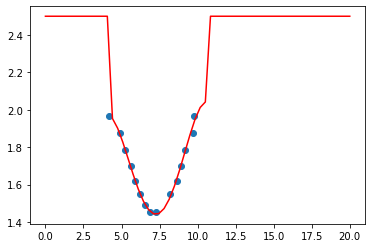

In [33]:
plt.scatter([ x[0] for x in stable], [ x[1] for x in stable])
plt.plot(xnew, func_new(xnew, *popt), 'r-')

In [34]:

def stable_crop(file,col,frac, a,b,c,d,e):
  stable_curves = []
  boolean_array = file['Mg'] < func_new(file['R'],a,b,c,d,e)
  # print(boolean_array)
  boolean_new = []
  boolean_element = boolean_array[0]
  # print(boolean_array)
  i=0
  while boolean_element == True and i<len(boolean_array):
    boolean_element = boolean_array[i]
    boolean_new.append(boolean_element)
    i=i+1
  while i < len(boolean_array):
    boolean_new.append(False)
    i = i+1
  boolean_array = boolean_new
  # print(boolean_array)

  for i in range(len(boolean_array)):

    if boolean_array[i] == True:
      R,M = file['R'][i], file['Mg'][i]
      stable_curves.append((R,M))
      plt.plot(file['R'][i], file['Mg'][i],lw=1, marker = '.', c = col,label = '{}%'.format(frac) if i == 0 else "" )

    elif boolean_array[i] == False:
      R,M = file['R'][i], file['Mg'][i]
      # print(R, M, func(file['R'][i],a,b,c,d,e))
      

    # if file['M'] < func(file['R'], a,b,c,d,e):
    #   plt.scatter(file['R'], file['Mg'],marker='.',s=3, c = 'b' )
    # else:
    #   plt.scatter(file['R'], file['Mg'],marker='.',s=3, c = 'r' )
  

  return stable_curves


In [35]:
data_con_sly = [data_con_sly1,data_con_sly2, data_con_sly3,data_con_sly4, data_con_sly5, data_con_sly6, data_con_sly7, data_con_sly8,data_con_sly9]
data_frac = [10,20,30,40,50,60,70,80,90 ]
data_colours = ['b','orange','y','c','m','indigo','pink','lime','brown']

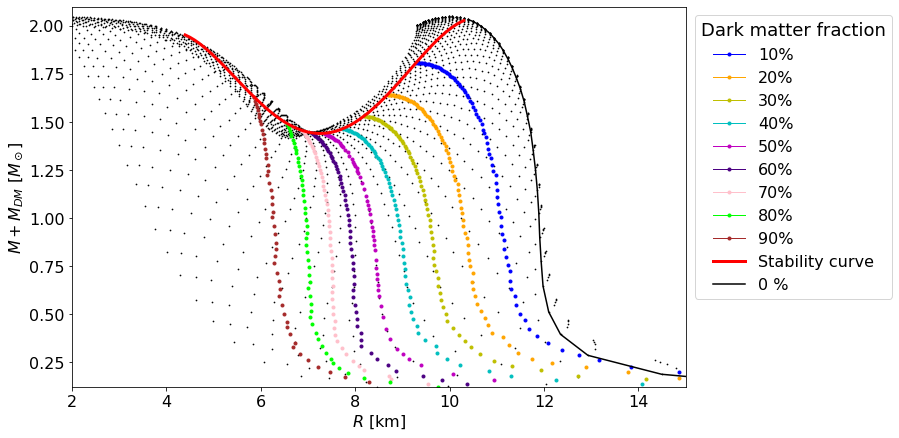

In [36]:
plt.figure(figsize= (11,7))
stable_m_r = []
for i,j,k in zip(data_con_sly,data_frac,data_colours):
  
  stable_m_r.append(np.array(stable_crop(i,k,j,*popt)))

for i in range(9):
  np.savetxt( 'stable_m_r_sly_{}.csv'.format(i),stable_m_r[i], delimiter=',',header='R,M', comments = "")
# stable_crop(data_con_sly5,*popt)

plt.xlabel(r'$R$ [km]', size = 16) # add plot labels, etc.
plt.ylabel(r'$M+M_{DM}$ [$M_\odot$]', size = 16)
plt.plot(xnew2, func(xnew2, *popt), 'r-',label = 'Stability curve', lw = 3)
plt.plot(dat['R'][100:1583:48],(dat['Mg'])[100:1583:48], label = '0 %', color = 'k')
plt.scatter(dat['R'],dat['Mg'],marker='.',s=2,c='k')


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(bbox_to_anchor=(1.35, 1), fontsize = 16, title='Dark matter fraction',title_fontsize=18 )
plt.xlim(2,15)
plt.ylim(0.12,2.1)
plt.show()


In [40]:
# plt.plot(stable_m_r[0][:,0],stable_m_r[0][:,1])

In [39]:
# stable_m_r[0]